In [141]:
# Python imports
import os
import sys
import time

# Add the path to the parent directory to augment search for module
sys.path.append(os.getcwd())
# Add the path to the parent directory to augment search for module
par_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if par_dir not in sys.path:
    sys.path.append(par_dir)
    
# ML imports
import torch
import matplotlib.pyplot as plt
import numpy as np

from nbutils import *

# Extra imports for image and data processing
from PIL import Image, ImageDraw
import json

In [144]:
#triumf_ml1_dir = '/home/s4hoque/DwaveSampInteg'
#recover_dir = triumf_ml1_dir+'/CaloQVAE/outputs/2022-11-30/22-26-46/beta_estimation_data'
recover_dir = '/fast_scratch_1/CaloData/ModelData/beta_histogram_data'

In [145]:
ising_weights, ising_vbias, ising_hbias, aux_crbm_energy_exps, dwave_energies, betas= recover_saved_parameters(recover_dir, nb_data=0)

In [149]:
def plot_paper_energies(energies1, energies2, binwidth=2.2, beta=None, save_image=False):
    """
    Plot the energies of the samples produced by the histograms   
    UPDATE: bin now found using bin boundaries
    """
    fig, ax = plt.subplots(figsize=(40, 20))
    data = np.concatenate((energies1,energies2), axis=0)
    bins =  np.arange(min(data), max(data) + binwidth, binwidth)
    ax.hist(energies1, bins=bins, label = "QPU Samples", edgecolor='darkblue', linewidth=2, color = "white",  histtype='stepfilled', density=True)  
    ax.hist(energies2, bins=bins, label = "Classical Samples", alpha=0.2, density=True) 
    plt.legend(loc='upper right', fontsize=60)
    if (beta!=None):
        plt.title(r'$\beta_{eff}^{*} = $'+format(beta,'.3f'), fontsize = 60)
    ax.set_xlabel("Energy", fontsize=85)
    ax.set_ylabel("Solution Probabilities", fontsize=85, labelpad=30)
    
    ax.tick_params(axis='both', which='major', labelsize=70)
    ax.grid(True)
    plt. grid(False)
#     if (save_image==False): 
#         plt.show()
    #plt.savefig("energy_histogram.jpeg")
    plt.show()
    plt.close()
    #return fig

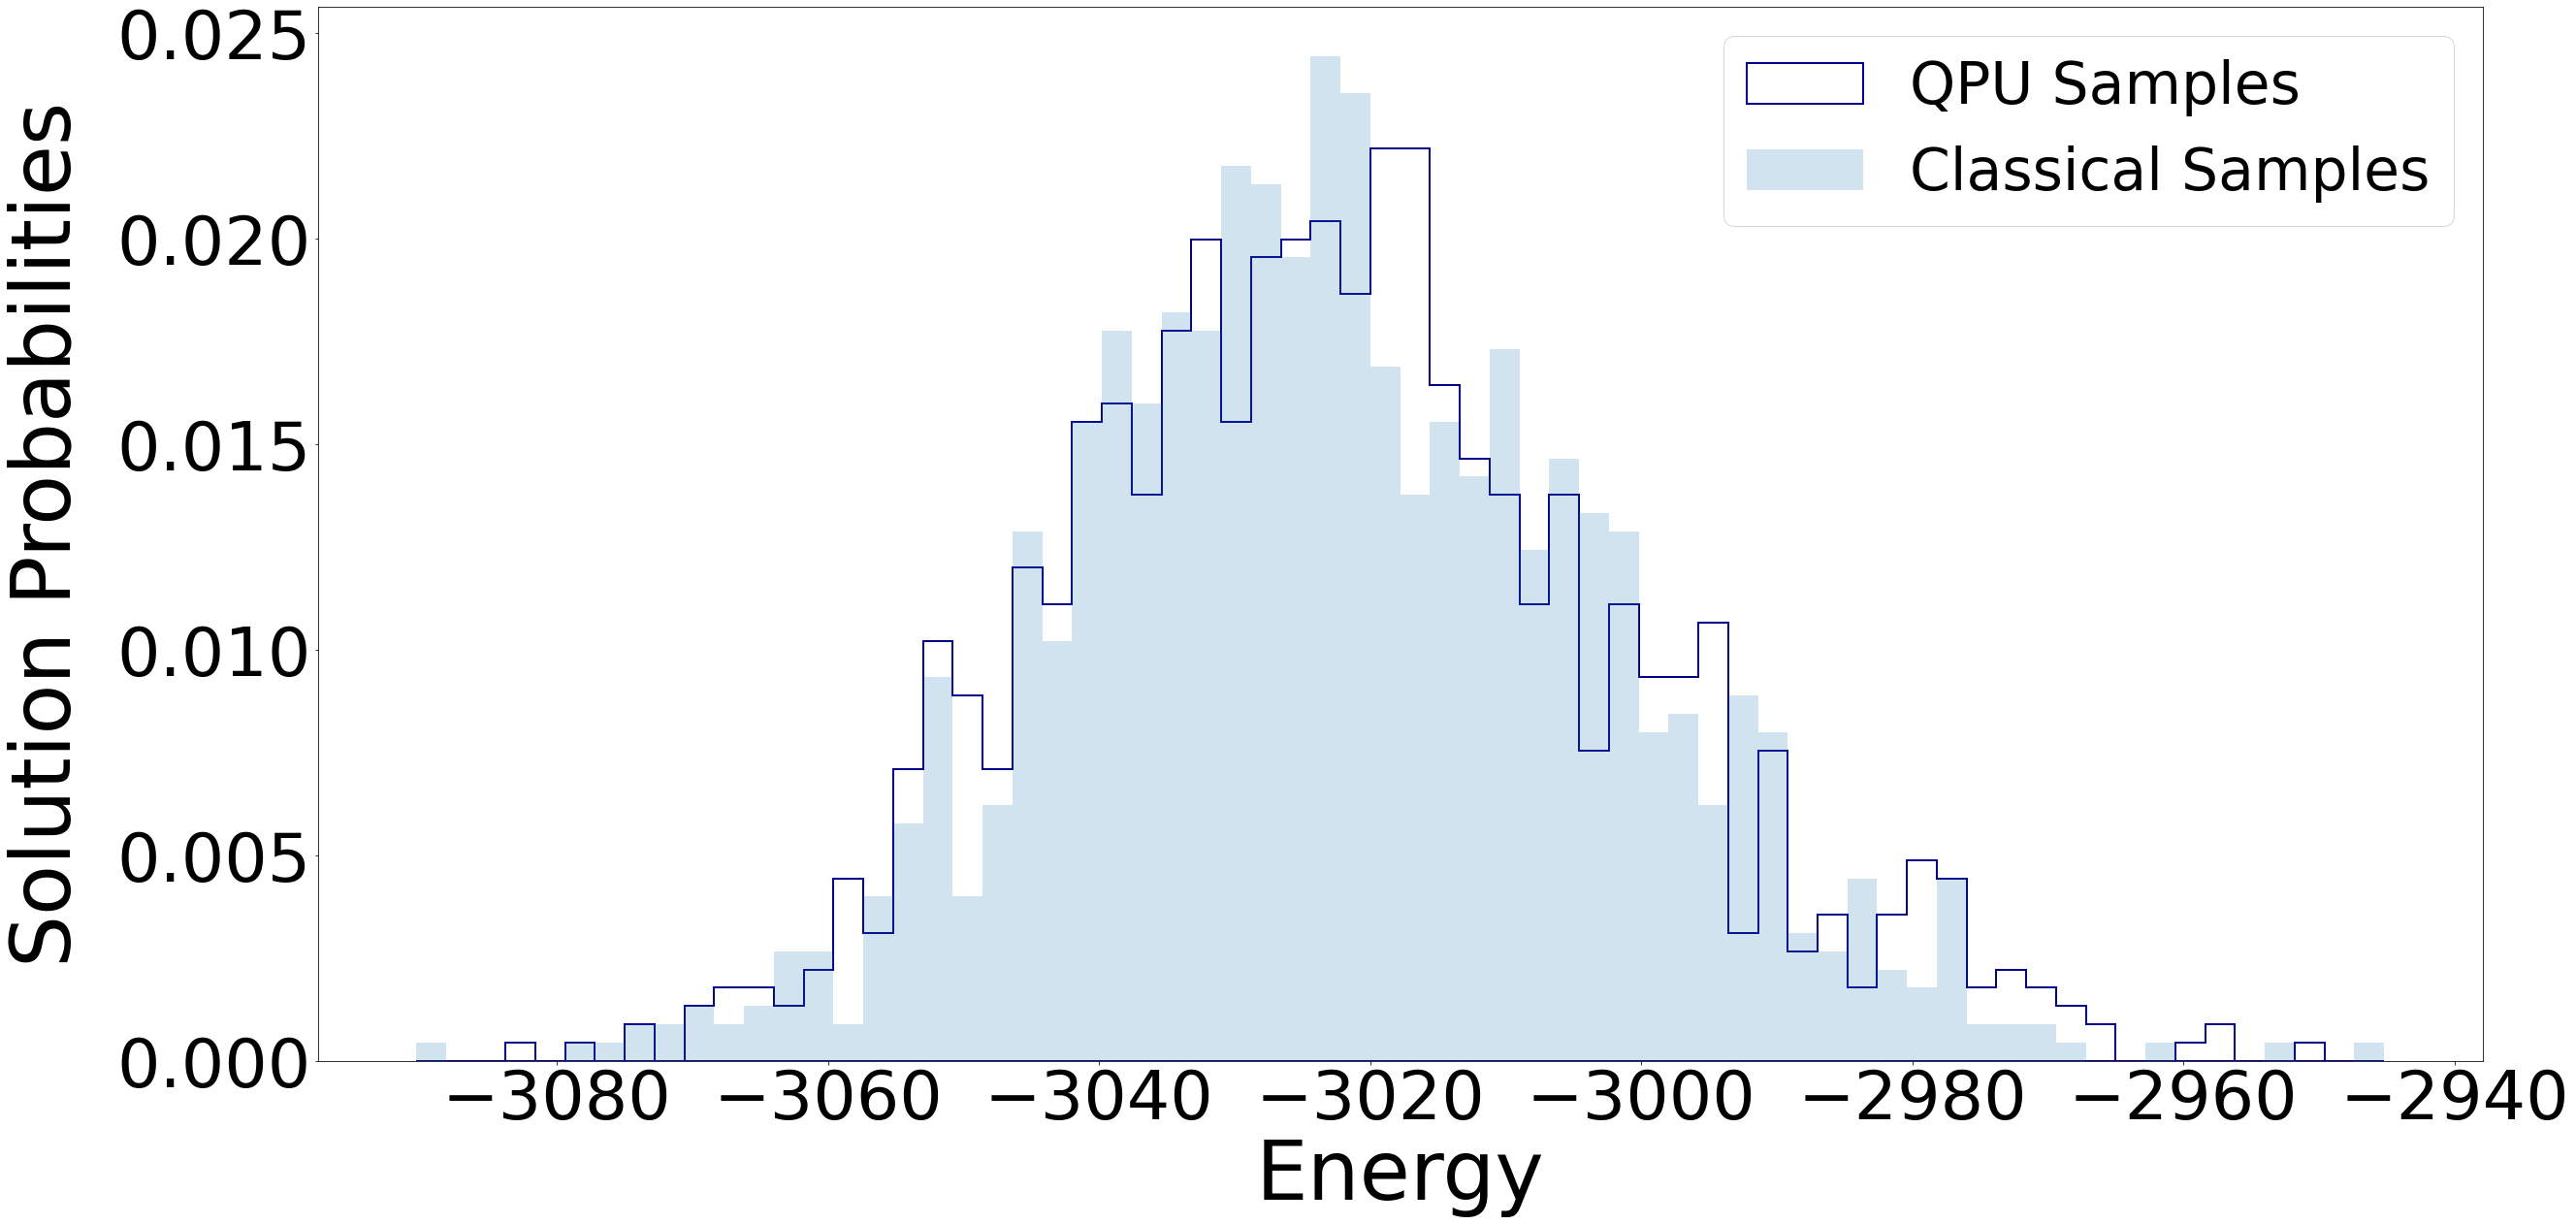

In [150]:
plot_paper_energies(dwave_energies[2], aux_crbm_energy_exps)

In [148]:
len(aux_crbm_energy_exps)

1024

In [ ]:
# len(aux_crbm_energy_exps) -> 1024
# len(dwave_energies) -> 3
# len(dwave_energies[2]) -> 1024